We will determine how many collisions (on average) a molecule makes in travelling a distance $R$

Assuming that a molecule travels on average $r_{rms}$ between collisions

In [44]:
import random
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import matplotlib.style
print(matplotlib.style.available)
matplotlib.style.use('classic')

random.seed(None) # None means that the system will seed using system clock

def gen_2d_walk(jmax):
    jmax = jmax

    x_array = np.zeros(jmax + 1)
    y_array = np.zeros(jmax + 1)

    for i in range(jmax):
        dx = (random.random() - 0.5)*2
        dy = (random.random() - 0.5)*2
        L = sqrt(dx**2 + dy**2)
        x_array[i+1] = x_array[i] + dx/L # the 1/L is the normalization factor
        y_array[i+1] = y_array[i] + dy/L

    return x_array, y_array


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


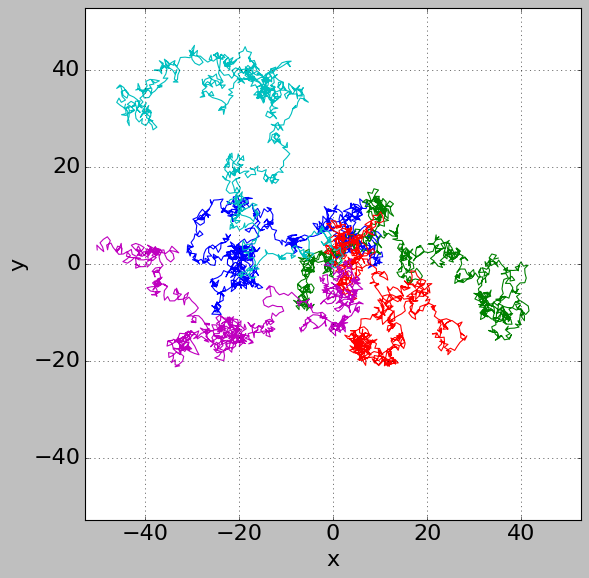

In [52]:
fig, ax = plt.subplots(figsize = (8,8))

max_val = 0
for i in range(5):
    x_walk, y_walk = gen_2d_walk(1000)
    max_val = np.max([max_val,np.max(np.abs(np.concatenate((x_walk, y_walk))))])
    ax.plot(x_walk, y_walk)

max_val = 1.05*max_val
ax.set_xlim((-max_val, max_val))
ax.set_ylim((-max_val, max_val))
ax.set_xlabel("x", fontsize = 20)
ax.set_ylabel("y", fontsize = 20)
ax.tick_params('both', labelsize = 20)
ax.grid(True)
